In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings(action='ignore')


In [25]:
from google.colab import files
uploaded =files.upload()

Saving Cars.csv to Cars (1).csv


In [26]:
df=pd.read_csv("Cars.csv")
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [27]:
print('Shape :',df.shape)
print('Number of rows :',df.shape[0])
print('Number of columns :',df.shape[1])

Shape : (81, 5)
Number of rows : 81
Number of columns : 5


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [29]:
df.isnull().sum().any()

False

In [30]:
df.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


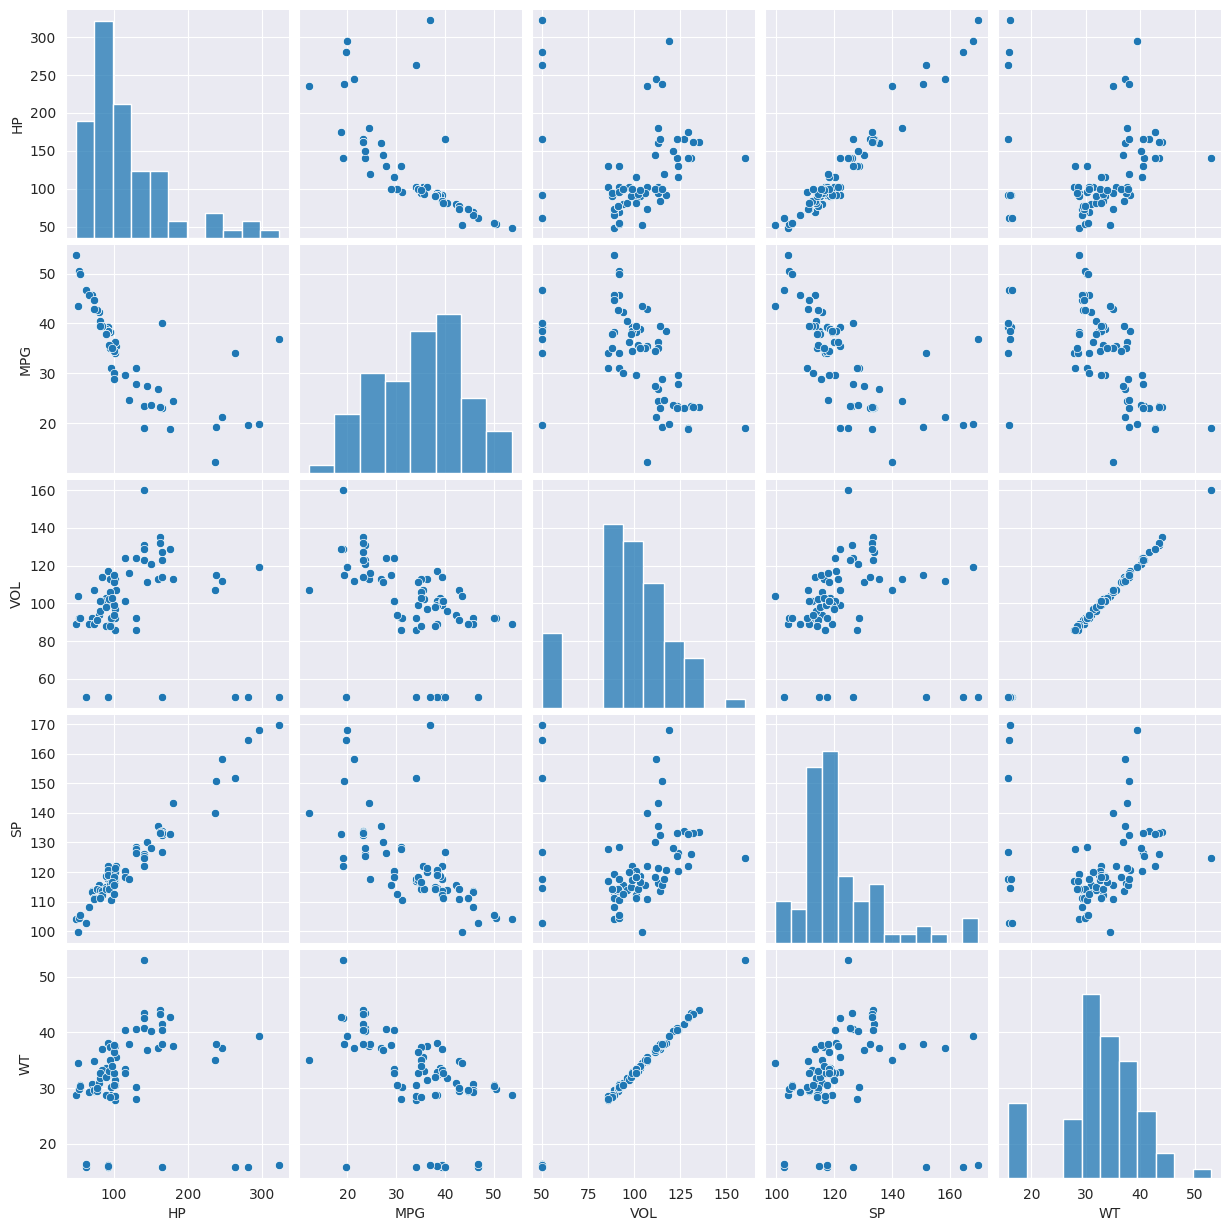

In [31]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [32]:
model=smf.ols('MPG~WT+VOL+SP+HP',data=df).fit()

In [33]:
model.params

,0
Intercept,30.677336
WT,0.400574
VOL,-0.336051
SP,0.395627
HP,-0.205444


In [34]:
print(model.rsquared,'\n',model.rsquared_adj)

0.7705372737359842 
 0.7584602881431413


In [35]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           1.54e-23
Time:                        09:10:07   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.0

<Figure size 1200x800 with 0 Axes>

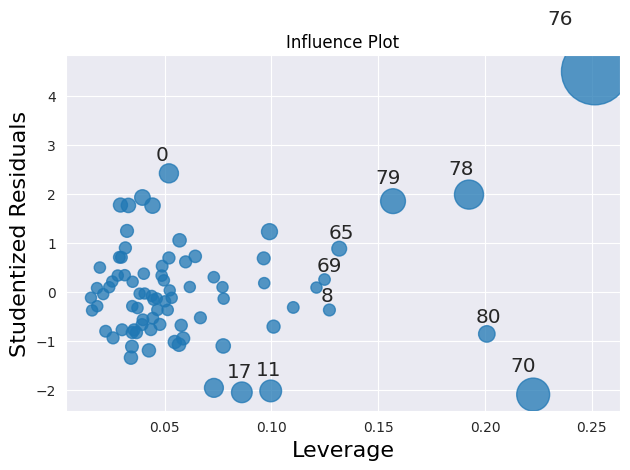

In [36]:
plt.figure(figsize=(12, 8))
influence_plot(model, alpha=0.05)
plt.title('Influence Plot')
plt.tight_layout()
plt.show()

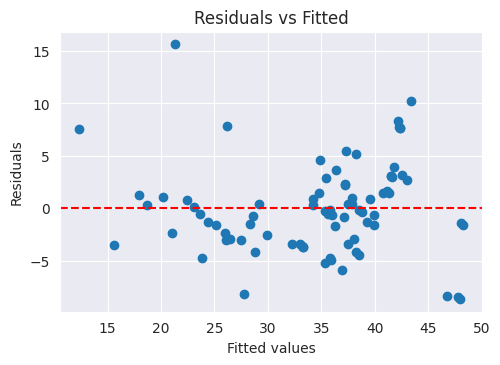

In [37]:
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(y=0, color='r', linestyle='--')

Text(0.5, 1.0, 'Q-Q plot')

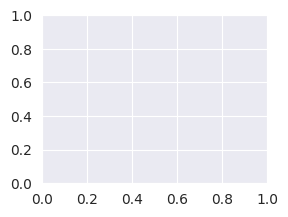

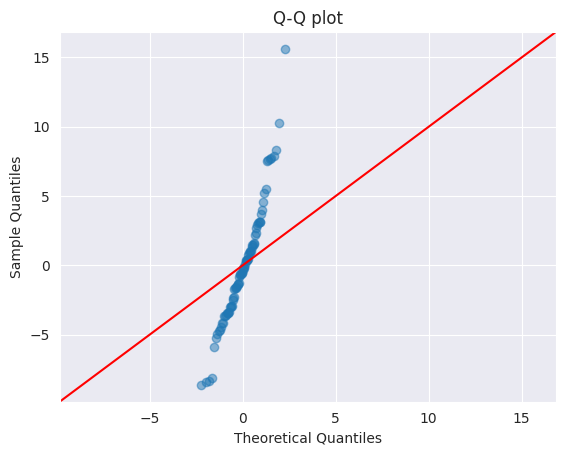

In [38]:
plt.subplot(222)
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model.resid)
QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plt.title('Q-Q plot')

Text(0.5, 1.0, 'Scale-Location Plot')

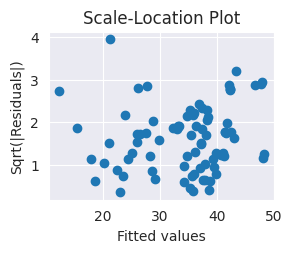

In [39]:
plt.subplot(223)
plt.scatter(model.fittedvalues, np.sqrt(abs(model.resid)))
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(|Residuals|)')
plt.title('Scale-Location Plot')

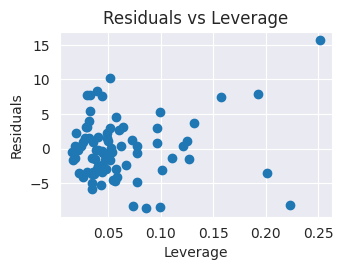

In [40]:
plt.subplot(224)
plt.scatter(model.get_influence().hat_matrix_diag, model.resid)
plt.xlabel('Leverage')
plt.ylabel('Residuals')
plt.title('Residuals vs Leverage')

plt.tight_layout()
plt.show()

In [41]:
print(pd.DataFrame({
    'Coefficient': model.params,
    't-value': model.tvalues,
    'p-value': model.pvalues,
    'Standard Error': model.bse
}))

           Coefficient   t-value   p-value  Standard Error
Intercept    30.677336  2.058841  0.042936       14.900296
WT            0.400574  0.236541  0.813649        1.693463
VOL          -0.336051 -0.590970  0.556294        0.568642
SP            0.395627  2.499880  0.014579        0.158258
HP           -0.205444 -5.238735  0.000001        0.039216


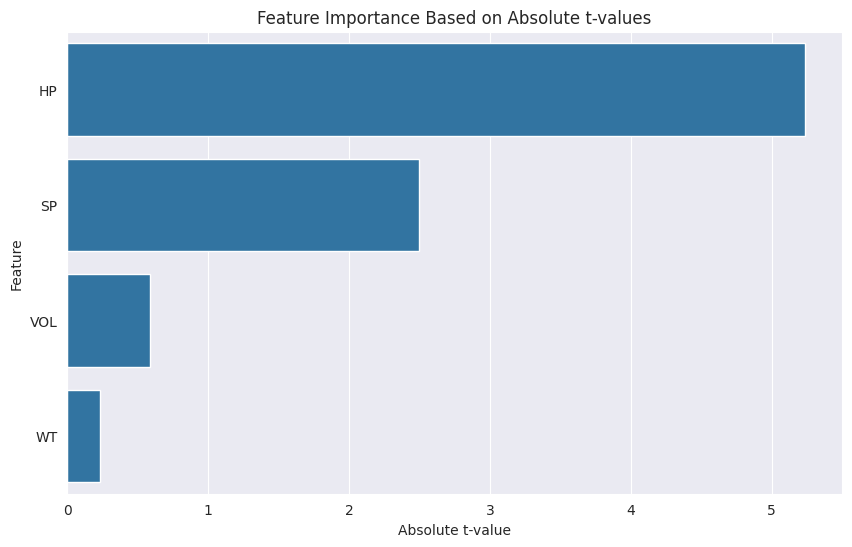

In [42]:
feature_importance = pd.DataFrame({
    'Feature': model.params.index[1:],  # Excluding intercept
    'Absolute t-value': abs(model.tvalues[1:])
})
feature_importance = feature_importance.sort_values('Absolute t-value', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute t-value', y='Feature', data=feature_importance)
plt.title('Feature Importance Based on Absolute t-values')
plt.show()